# Using Supervised Learning To Predict Diagnosis of a Breast Tumor 
  
#### Getting Started: Load libraries and data set

In [132]:
import pandas as pd
data = pd.read_csv('data.csv')

#### Inspecting Data
We are going to use data.head() method. It returns the first few records of the data.

In [133]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### More information about the data

In [134]:
count_M = 0
count_B = 0
for index,row in data.iterrows():
    if row['diagnosis'] == 'M':
        count_M = count_M + 1
    else:
        count_B = count_B +1
print("Data shape                 :{}".format(data.shape))
print("number of Malignant records:{}".format(count_M))
print("number of Benign records   :{}".format(count_B))

Data shape                 :(569, 33)
number of Malignant records:212
number of Benign records   :357


##### **Observation**
> *357 observations indicating the absence of cancer cells and 212 show absence of cancer cell*

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

#### OBSERVATION: 
>There are no null values in the data.

In [136]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

### Exploratory Data Analysis

#### Statistics

In [137]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [138]:
data.skew()

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

#### Data Visualization

In [139]:
%matplotlib inline
data_id_diag = data.loc[:,["id","diagnosis"]]
data_diag = data.loc[:,["diagnosis"]]
data_mean = data.ix[:,1:32]
print(type(data))

<class 'pandas.core.frame.DataFrame'>


C:\Users\POLI\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


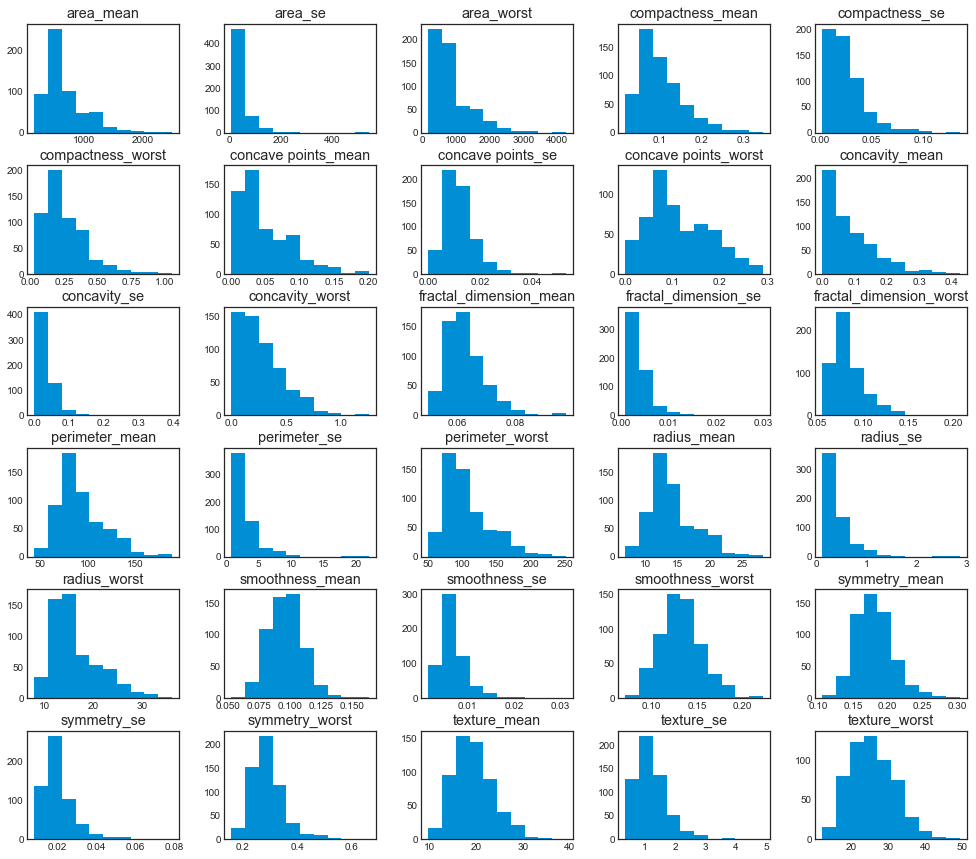

In [140]:
hist_mean = data_mean.hist(bins=10,figsize=(15,15),grid=False)

### Correlation matrix

<class 'pandas.core.frame.DataFrame'>
<class 'matplotlib.figure.Figure'>


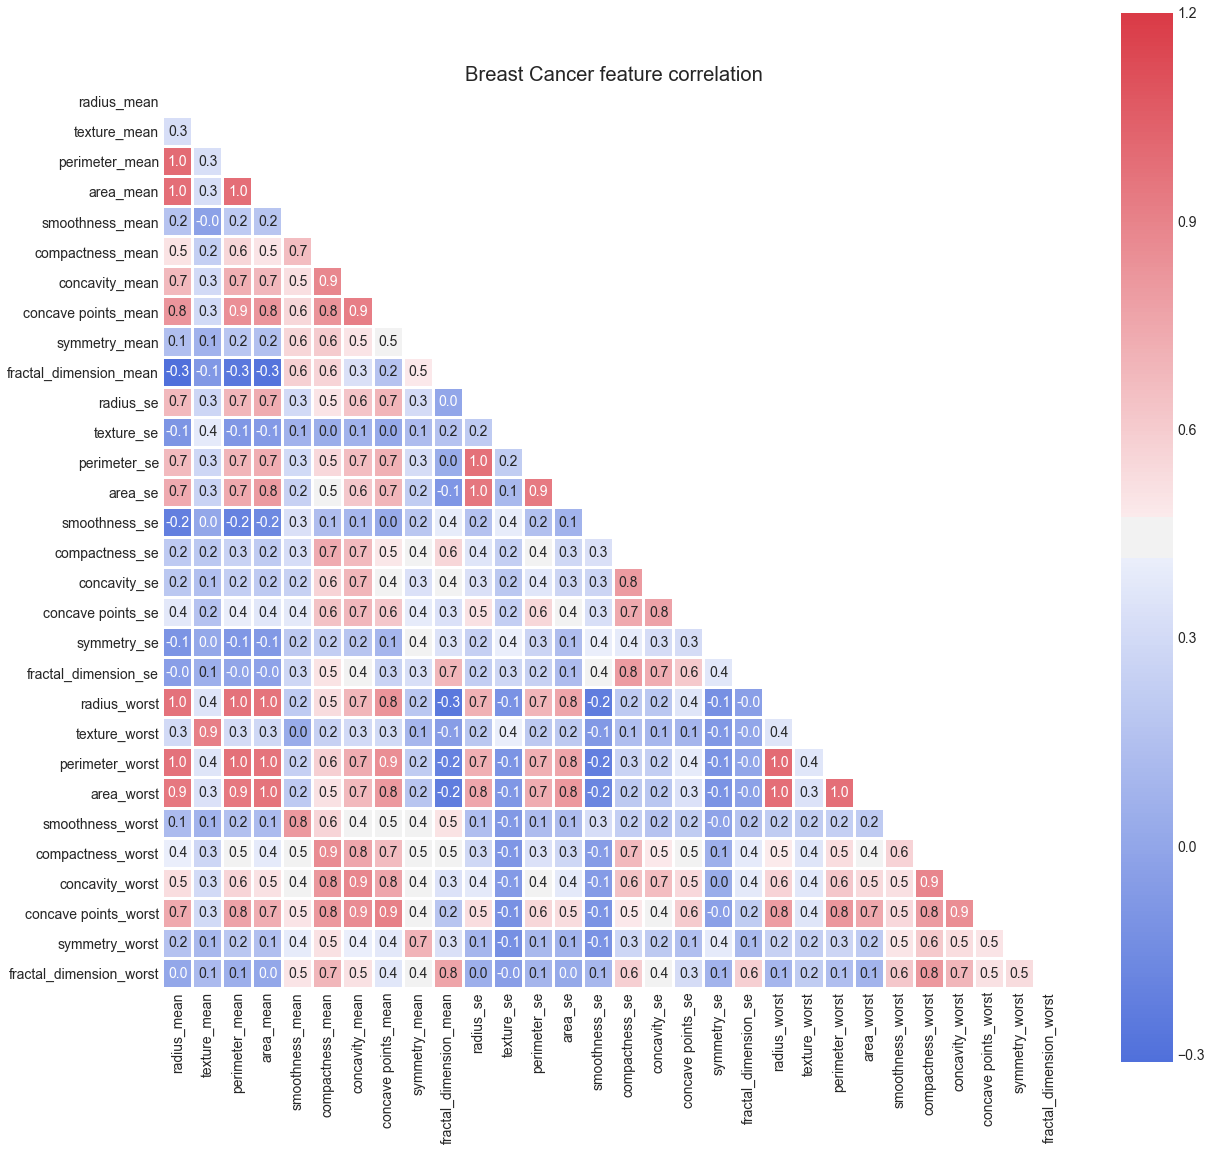

In [141]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style('white')


corr = data_mean.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
print(type(data))
data, ax = plt.subplots(figsize=(18,18))
print(type(data))
plt.title("Breast Cancer feature correlation")
cmap = sns.diverging_palette(260,10,as_cmap=True)
sns.heatmap(corr,vmax=1.2,square='square',cmap=cmap,ax=ax,annot=True,fmt='.1f',mask = mask,linewidths=2)

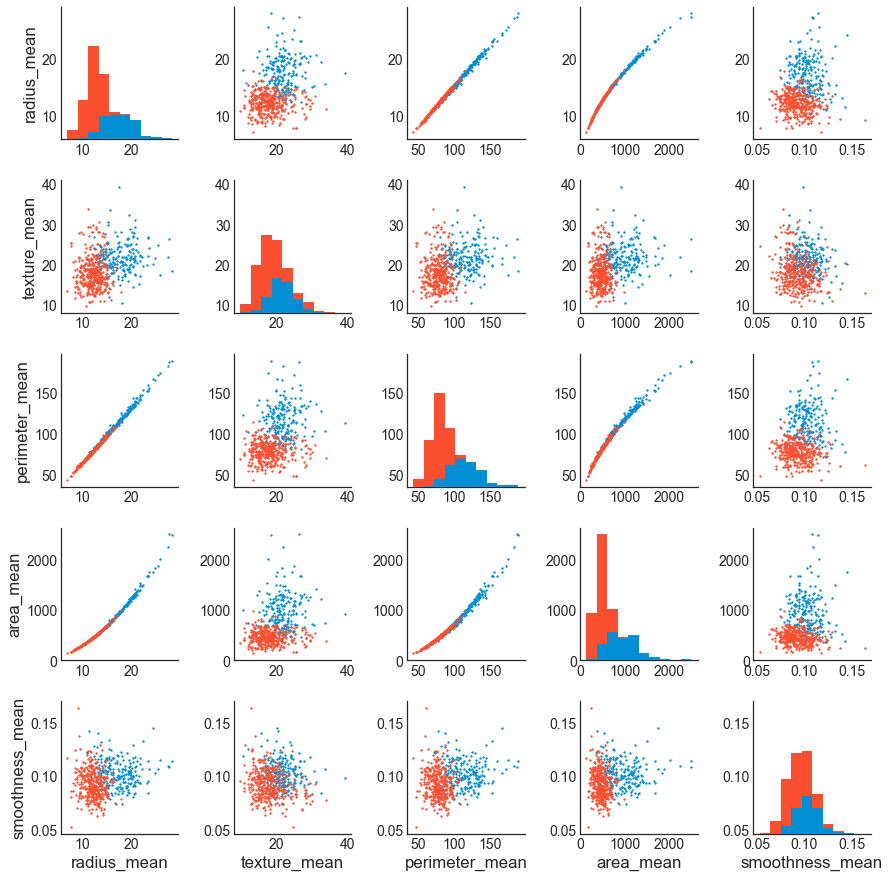

In [142]:
plt.style.use('fivethirtyeight')
sns.set_style('white')
data = pd.read_csv('data.csv')
g = sns.PairGrid(data[[data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5],data.columns[6]]],hue='diagnosis') 
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter,s=3)

#### Label Encoding

In [143]:


data = pd.read_csv('data.csv', index_col=False)
data.drop(['id'],axis=1, inplace=True)
#data.drop('Unnamed: 0',axis=1, inplace=True)
array = data.values
X = array[:,1:31]
y = array[:,0]
print(X)

[[17.99 10.38 122.8 ..., 0.2654 0.4601 0.1189]
 [20.57 17.77 132.9 ..., 0.18600000000000003 0.275 0.08902]
 [19.69 21.25 130.0 ..., 0.243 0.3613 0.08757999999999999]
 ..., 
 [16.6 28.08 108.3 ..., 0.1418 0.2218 0.0782]
 [20.6 29.33 140.1 ..., 0.265 0.4087 0.124]
 [7.76 24.54 47.92 ..., 0.0 0.2871 0.07039]]


In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

> After encoding 
1. Malignant is represented as 1
2. Benign is represented as 0

#### Split data into train and test sets

In [145]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7)

#### Feature Standardization
* Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
NewX = scaler.fit_transform(X)

#### Feature decomposition using PCA

In [147]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
fit = pca.fit(NewX)

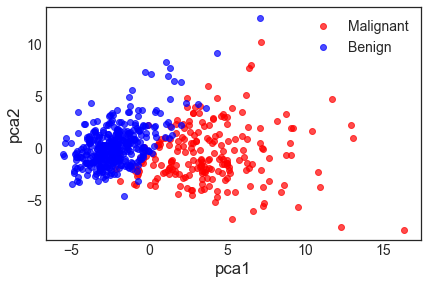

[ 0.44272026  0.18971182  0.09393163  0.06602135  0.05495768  0.04024522
  0.02250734  0.01588724  0.01389649  0.01168978]


In [148]:
pca_X = pca.transform(NewX)

PCA_dataframe = pd.DataFrame()

PCA_dataframe['pca1'] = pca_X[:,0]
PCA_dataframe['pca2'] = pca_X[:,1]

plt.plot(PCA_dataframe['pca1'][data.diagnosis == 'M'],PCA_dataframe['pca2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_dataframe['pca1'][data.diagnosis == 'B'],PCA_dataframe['pca2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend(['Malignant','Benign'])
plt.show()
print(pca.explained_variance_ratio_)

#### Predictive model using Support Vector Machine (SVM)

In [149]:
from scipy.stats import norm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.pipeline import make_pipeline

results = []
X_train,X_test,y_train,y_test = train_test_split(NewX,y,test_size=0.33,random_state=50)
clf = SVC(probability=True)
clf.fit(X_train,y_train)
classifier_score = clf.score(X_test,y_test)
print(classifier_score)
print(X_test.shape)
results.append(classifier_score)

0.962765957447
(188, 30)


In [150]:
clf = SVC(probability=True)
clf.fit(X_train,y_train)
y_pred = clf.fit(X_train,y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[117   4]
 [  3  64]]


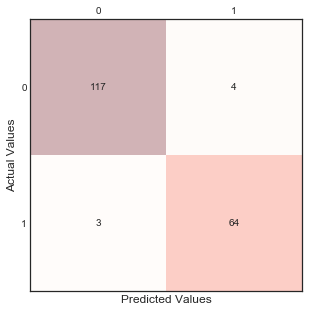

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       121
          1       0.94      0.96      0.95        67

avg / total       0.96      0.96      0.96       188



In [151]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

>#### Observation 
>There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates presence of cancer cells) and Benign
= 0 (indicates absence).

>* The classifier made a total of 188 predictions (i.e 188 patients were being tested for the presence of breast cancer).
>* Out of those 188 cases, the classifier predicted "yes" 68 times, and "no" 120 times.
>* In reality, 67 patients in the sample have the disease, and 121 patients do not.
>* It predicted 3 effected patients as Benign and 4 benign patient as malignant. 

#### Parameter Tuning using GridSearchCV

In [152]:
kernel_val = ['linear','poly','rbf','sigmoid']
param_grid = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6),'kernel': kernel_val}
grid = GridSearchCV(SVC(),param_grid = param_grid,cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
print(grid.best_params_,grid.best_score_)
clf = SVC(kernel = 'linear',C =0.10000000000000001,gamma = 0.001 )
clf.fit(X_train,y_train)
y_pred = clf.fit(X_train,y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

({'kernel': 'linear', 'C': 0.10000000000000001, 'gamma': 0.001}, 0.97900262467191601)


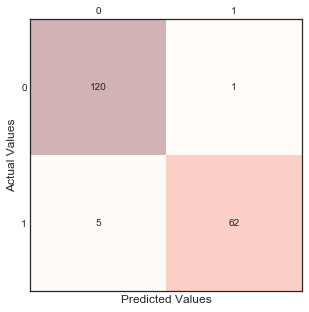

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       121
          1       0.98      0.93      0.95        67

avg / total       0.97      0.97      0.97       188



In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

>#### Observation 
>There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates presence of cancer cells) and Benign
= 0 (indicates absence).

>* The classifier made a total of 188 predictions (i.e 188 patients were being tested for the presence of breast cancer).
>* Out of those 188 cases, the classifier predicted "yes" 68 times, and "no" 120 times.
>* In reality, 67 patients in the sample have the disease, and 121 patients do not.
>* It predicted 5 effected patients as Benign and 1 benign patient as malignant. 

### Comparison between optimised parameters and previously used parameters
* It's better to use previous parameters for our model.
* Though it's giving less accuracy_score it's recall value for class 1 is more than the optimal model's recall value for class 1.
* In this case, it's more important to identify malignant patients correctly rather than predicting benign patients.
* In the previous model, its giving less false negatives than optimised one.
* So,I conclude by saying that previously used parameter values are better than the second.

### Using other Supervised Learning models 

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'KNC' , KNeighborsClassifier()))
models.append(( 'DTC' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))

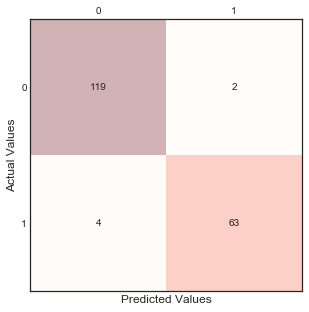

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       121
          1       0.97      0.94      0.95        67

avg / total       0.97      0.97      0.97       188



In [156]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.fit(X_train,y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

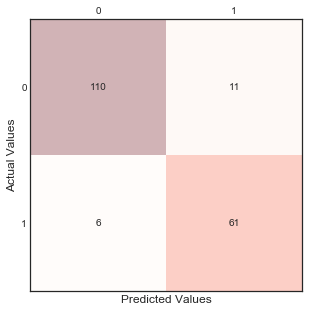

             precision    recall  f1-score   support

          0       0.95      0.91      0.93       121
          1       0.85      0.91      0.88        67

avg / total       0.91      0.91      0.91       188



GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'max_depth': [50, 100, 10, 200], 'min_samples_leaf': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [157]:
clf = DecisionTreeClassifier()
#DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
criterion = ['gini','entropy']
splitter = ['best','random']
max_depth = [50,100,10,200]
min_samples_leaf = [1,5,10]
clf.fit(X_train,y_train)
y_pred = clf.fit(X_train,y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

param_grid = {'criterion':criterion,'splitter':splitter,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid = param_grid,cv=5)
grid.fit(X_train, y_train)

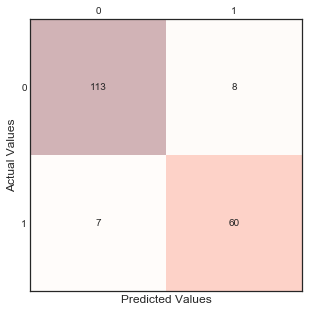

             precision    recall  f1-score   support

          0       0.94      0.93      0.94       121
          1       0.88      0.90      0.89        67

avg / total       0.92      0.92      0.92       188



In [158]:
clf =  GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.fit(X_train,y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

In [159]:

#metrics_list = ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

results = []
names = []
results2 = []
names2 = []
results3 = []
names3 = []

for name,model in models:
    result = cross_val_score(model,X_train,y_train,cv = 10,scoring = 'precision')
    results.append(result)
    names.append(name)
    
    result = cross_val_score(model,X_train,y_train,cv = 10,scoring = 'recall')
    results2.append(result)
    names2.append(name)
    
    result = cross_val_score(model,X_train,y_train,cv = 10,scoring = 'accuracy')
    results3.append(result)
    names3.append(name)
    

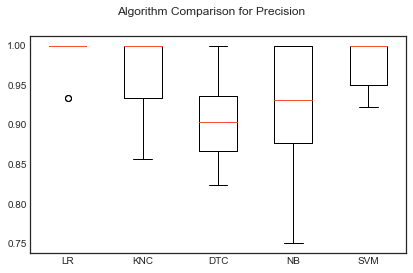

In [160]:
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison for Precision' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

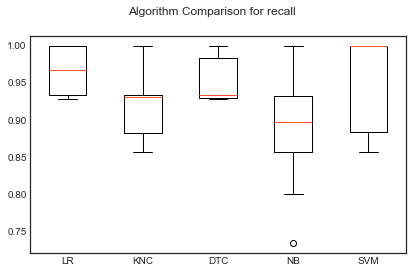

In [161]:
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison for recall' )
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

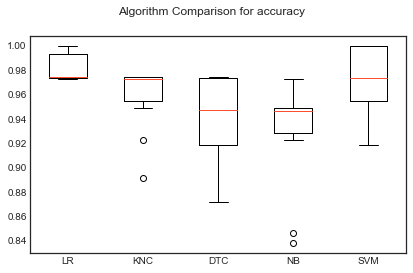

In [162]:
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison for accuracy' )
ax = fig.add_subplot(111)
plt.boxplot(results3)
ax.set_xticklabels(names3)
plt.show()